## J.K. Duda games and openings analysis
This is on the dataset created by Rob Mulla (https://www.kaggle.com/datasets/robikscube/this-week-in-chess-archive)
Firstly I made some cleaning and EDA.
Next is analyze of J.K. Duda most played openings.
Finaly analysis of two his lose games with biggest ELO difference.

In [3]:
#chess library
!pip install chess

In [4]:
#library to saving/reading games files
!pip install pyarrow

In [5]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import chess
import pyarrow

pd.set_option('display.max_columns', 100)
sns.set_style("darkgrid")

In [6]:
pd.options.mode.chained_assignment = None 

In [7]:
df = pd.read_parquet(r'C:\Users\sebas\Downloads\archive (9)\twic_master.parquet')

In [6]:
df.head()

,twic_number,White,Black,Date,EventDate,Event,Result,mainline_moves,Site,Online,Round,ECO,Opening,WhiteFideId,BlackFideId,WhiteElo,BlackElo,Variation,WhiteTitle,BlackTitle,WhiteTeam,BlackTeam,EventType,FEN,SetUp,Variant,Board,PlyCount,EventCategory
0,1260,"Tukhaev,A","Carlsen,M",2018-12-26,2018.12.26,World Rapid 2018,1-0,1. e4 c5 2. Nf3 Nc6 3. d4 cxd4 4. Nxd4 Nf6 5. ...,St Petersburg RUS,False,1.1,B33,Sicilian,14109476,1503014,2527,2835,"Pelikan, Chelyabinsk variation",GM,GM,None,None,None,None,None,None,None,None,None
1,1260,"Nakamura,Hi","Teske,H",2018-12-26,2018.12.26,World Rapid 2018,1-0,1. Nf3 Nf6 2. g3 d5 3. Bg2 g6 4. c4 dxc4 5. Na...,St Petersburg RUS,False,1.2,A05,Reti opening,2016192,4611500,2746,2483,None,GM,GM,None,None,None,None,None,None,None,None,None
2,1260,"Tari,A","Artemiev,V",2018-12-26,2018.12.26,World Rapid 2018,0-1,1. e4 c5 2. Nf3 d6 3. Bb5+ Bd7 4. c4 Nc6 5. d4...,St Petersburg RUS,False,1.3,B52,Sicilian,1510045,24101605,2620,2709,"Canal-Sokolsky attack, 3...Bd7",GM,GM,None,None,None,None,None,None,None,None,None
3,1260,"Fedoseev,Vl3","Tregubov,P",2018-12-26,2018.12.26,World Rapid 2018,1/2-1/2,1. e4 e5 2. Nf3 Nf6 3. Nxe5 d6 4. Nd3 Nxe4 5. ...,St Petersburg RUS,False,1.4,C42,Petrov's defence,24130737,4115341,2719,2592,None,GM,GM,None,None,None,None,None,None,None,None,None
4,1260,"Hovhannisyan,R","Aronian,L",2018-12-26,2018.12.26,World Rapid 2018,1-0,1. e4 g6 2. d4 Bg7 3. Nc3 c6 4. Nf3 d6 5. h3 N...,St Petersburg RUS,False,1.5,B06,Robatsch defence,13302507,13300474,2637,2765,"two knights, Suttles variation",GM,GM,None,None,None,None,None,None,None,None,None


In [7]:
df.dtypes

twic_number                int64
White                     object
Black                     object
Date              datetime64[ns]
EventDate                 object
Event                     object
Result                    object
mainline_moves            object
Site                      object
Online                      bool
Round                     object
ECO                       object
Opening                   object
WhiteFideId               object
BlackFideId               object
WhiteElo                  object
BlackElo                  object
Variation                 object
WhiteTitle                object
BlackTitle                object
WhiteTeam                 object
BlackTeam                 object
EventType                 object
FEN                       object
SetUp                     object
Variant                   object
Board                     object
PlyCount                  object
EventCategory             object
dtype: object

In [8]:
df.shape

(1971319, 29)

In [9]:
# Clean results
df['Result'].value_counts()

1-0        804451
0-1        664438
1/2-1/2    502378
*              15
+/-            10
0-0             9
-/+             7
-               5
1-0 ff          2
00-1            1
1/2 1/2         1
(+)-(-)         1
1-O             1
Name: Result, dtype: int64

In [27]:
df = df.loc[ (df['Result'] == '1-0') | (df['Result'] == '0-1') | (df['Result'] == '1/2-1/2')]
df['Result'].value_counts()

1-0        804451
0-1        664438
1/2-1/2    502378
Name: Result, dtype: int64

In [56]:
# Players with most played games
pd.concat([df['White'], df['Black']]).value_counts().head(50)

Nakamura,Hi                        4462
Sarana,A                           3499
Fedoseev,Vl3                       2891
Carlsen,M                          2857
Andreikin,D                        2853
Jobava,Ba                          2838
Chigaev,M                          2815
Kamsky,G                           2777
So,W                               2749
Kosteniuk,A                        2714
Vachier Lagrave,M                  2709
Paravyan,D                         2696
Xiong,Jeffery                      2681
Mamedyarov,S                       2642
Demchenko,A                        2582
Aronian,L                          2562
Sjugirov,S                         2525
Bortnyk,Olexandr                   2520
Svane,R                            2506
Sadhwani,Raunak                    2506
Indjic,A                           2485
Caruana,F                          2484
Zhigalko,S                         2484
Dubov,Daniil                       2480
Grischuk,A                         2471


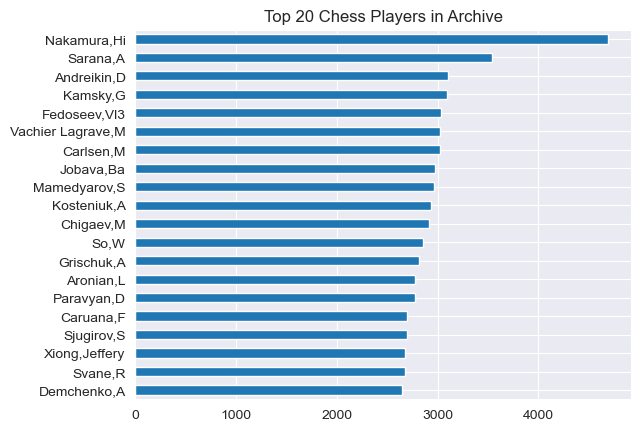

In [29]:
# Players who played the most games - viz
pd.concat([df['White'], df['Black']]).value_counts(ascending = True).tail(20) \
.plot(kind = 'barh', title = 'Top 20 Chess Players in Archive')
plt.show()

In [33]:
# Some cleaning of the year column
df['Year'] = df['Date'].dt.year

In [34]:
df['Year'].value_counts()

2021    302821
2022    226051
2020    222454
2019    188684
2018    185948
2017    173480
2016    154090
2015    142254
2013    141688
2014    140822
2012     92912
2011        54
2010         6
2005         1
1988         1
2029         1
Name: Year, dtype: int64

In [35]:
df = df.query('2023 > Year > 2013')

In [36]:
# Most played openings
df['Opening'].value_counts().head(50)

Sicilian                                         282353
French                                            98139
King's Indian                                     89424
Queen's pawn game                                 74300
QGD                                               73899
Caro-Kann                                         72663
Ruy Lopez                                         71757
English                                           71003
English opening                                   48409
Reti opening                                      44149
Sicilian defence                                  43795
Reti                                              41870
Nimzo-Indian                                      40509
QGD Slav                                          34190
Queen's pawn                                      27153
Gruenfeld                                         22080
Queen's Indian                                    21869
Catalan                                         

In [37]:
# Most played openings by year
df.groupby(['Year'])['Opening'].value_counts().head(50)

Year  Opening                                     
2014  Sicilian                                        22918
      French                                           8581
      King's Indian                                    7504
      English                                          6265
      Ruy Lopez                                        5780
      QGD                                              5593
      Caro-Kann                                        5019
      Queen's pawn game                                4494
      English opening                                  4289
      QGD Slav                                         3958
      Nimzo-Indian                                     3810
      Sicilian defence                                 3628
      Reti opening                                     3155
      Reti                                             2916
      Queen's Indian                                   2152
      Queen's pawn                               

In [39]:
# Example of opening by year. Why Ruy Lopez? Carlsen played it few times in 2021 and can be noticed that there's much more
# Ruy Lopez in 2021. 
df.query('Opening == "Ruy Lopez"')['Year'].value_counts()

2021    11375
2020     8921
2022     8862
2019     8103
2018     7863
2017     7459
2016     6817
2015     6577
2014     5780
Name: Year, dtype: int64

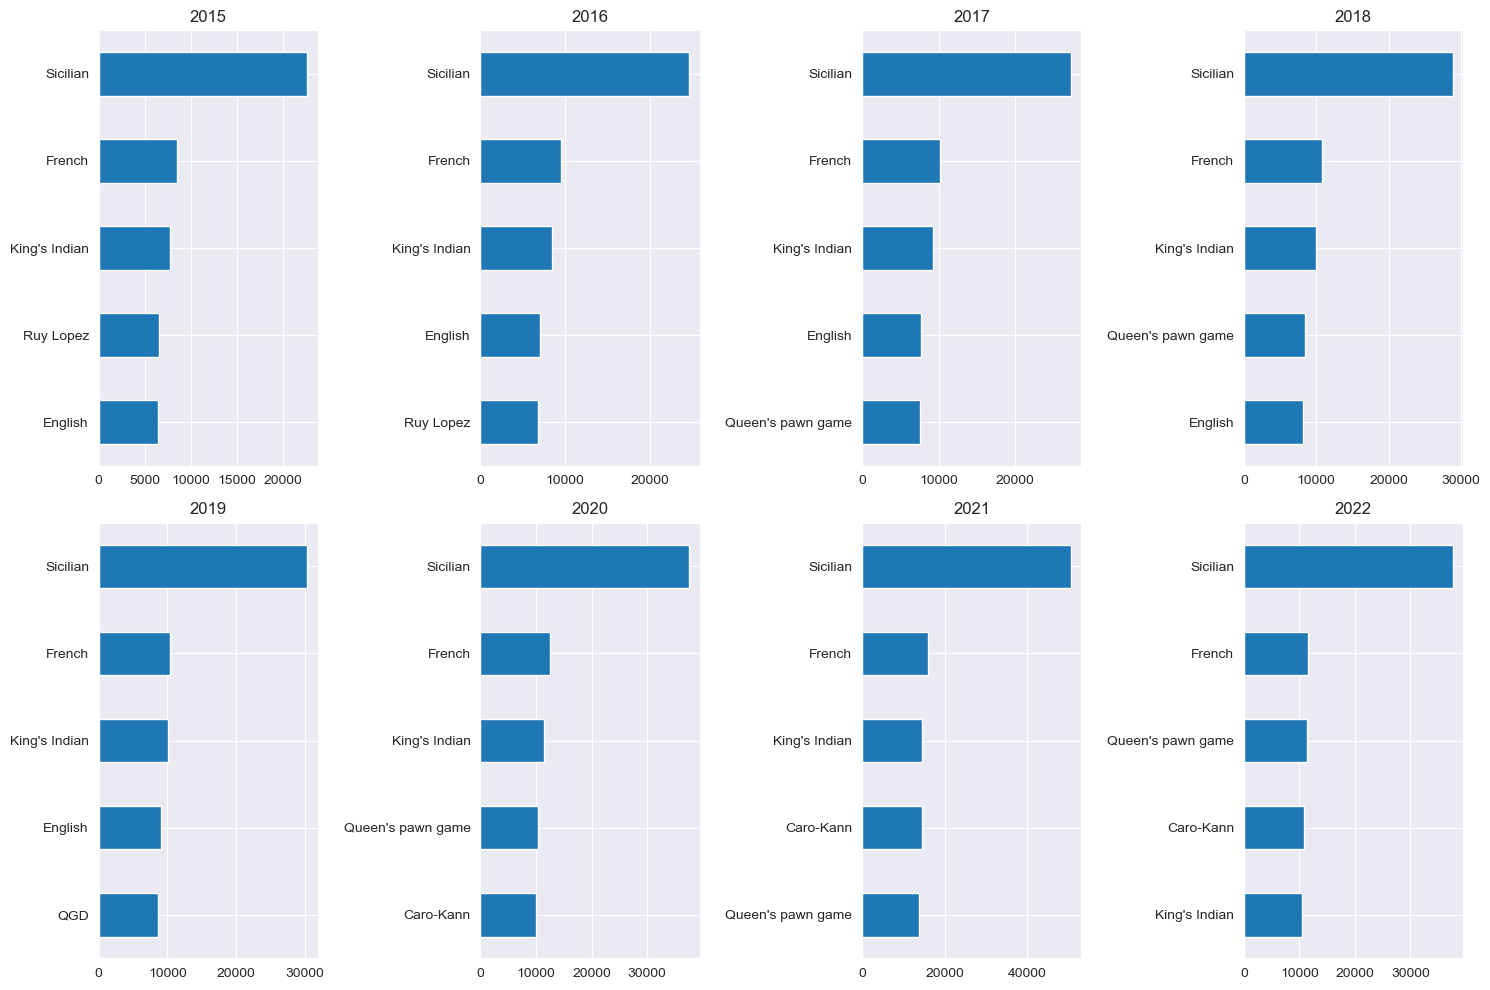

In [46]:
#Openings by year - vizzes
fig, axs = plt.subplots(2, 4, figsize = (15, 10))
axs = axs.flatten()
for i, myyear in enumerate (range (2015, 2023)):
    df.query("Year == @myyear")['Opening'].value_counts(ascending = True).tail(5).plot(kind = 'barh', title = myyear, 
                                                                                       ax = axs[i]
                                                                  )
plt.tight_layout()
plt.show()


In [85]:
df.query('White == "Duda,J" or Black == "Duda,J"')['Opening'].value_counts()

,twic_number,White,Black,Date,EventDate,Event,Result,mainline_moves,Site,Online,Round,ECO,Opening,WhiteFideId,BlackFideId,WhiteElo,BlackElo,Variation,WhiteTitle,BlackTitle,WhiteTeam,BlackTeam,EventType,FEN,SetUp,Variant,Board,PlyCount,EventCategory,Year
123,1260,"Huzman,A","Duda,J",2018-12-26,2018.12.26,World Rapid 2018,0-1,1. Nf3 Nf6 2. c4 g6 3. Nc3 d5 4. cxd5 Nxd5 5. ...,St Petersburg RUS,False,2.27,A15,English opening,2803828,1170546,2580,2738,None,GM,GM,None,None,None,None,None,None,None,None,None,2018
201,1260,"Duda,J",Wang Hao,2018-12-26,2018.12.26,World Rapid 2018,1/2-1/2,1. Nf3 d5 2. c4 e6 3. e3 Nf6 4. b3 b6 5. Bb2 B...,St Petersburg RUS,False,3.5,A13,English opening,1170546,8602883,2738,2730,Agincourt variation,GM,GM,None,None,None,None,None,None,None,None,None,2018
306,1260,Yu Yangyi,"Duda,J",2018-12-26,2018.12.26,World Rapid 2018,1-0,1. e4 e5 2. Nf3 Nf6 3. Nxe5 d6 4. Nf3 Nxe4 5. ...,St Petersburg RUS,False,4.8,C42,Petrov,8603820,1170546,2764,2738,classical attack,GM,GM,None,None,None,None,None,None,None,None,None,2018
430,1260,"Duda,J","Miton,K",2018-12-26,2018.12.26,World Rapid 2018,1/2-1/2,1. d4 Nf6 2. Bg5 e6 3. e4 h6 4. Bxf6 Qxf6 5. c...,St Petersburg RUS,False,5.30,A45,"Trompovsky attack (Ruth, Opovcensky opening)",1170546,1111914,2738,2588,None,GM,GM,None,None,None,None,None,None,None,None,None,2018
535,1260,"Gareev,T","Duda,J",2018-12-27,2018.12.26,World Rapid 2018,0-1,1. g4 d5 2. Bg2 Bxg4 3. c4 d4 4. Bxb7 Nd7 5. B...,St Petersburg RUS,False,6.34,A00,Grob,14200937,1170546,2569,2738,Romford counter-gambit,GM,GM,None,None,None,None,None,None,None,None,None,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1962075,1450,"Praggnanandhaa,R","Duda,J",2022-08-20,2022.08.15,FTX Crypto Cup 2022,0-1,1. Nf3 d5 2. g3 g6 3. Bg2 Bg7 4. O-O Nf6 5. c4...,Miami USA,False,6.5,A07,Reti,25059530,1170546,2661,2740,King's Indian attack,GM,GM,None,None,None,None,None,None,None,None,None,2022
1962076,1450,"Duda,J","Praggnanandhaa,R",2022-08-20,2022.08.15,FTX Crypto Cup 2022,1-0,1. d4 Nf6 2. Bg5 d5 3. Nd2 c5 4. Bxf6 gxf6 5. ...,Miami USA,False,6.6,A45,"Trompovsky attack (Ruth, Opovcensky opening)",1170546,25059530,2740,2661,None,GM,GM,None,None,None,None,None,None,None,None,None,2022
1962078,1450,"Duda,J","Giri,A",2022-08-21,2022.08.15,FTX Crypto Cup 2022,1-0,1. e4 e5 2. Nf3 Nc6 3. Bb5 Nf6 4. O-O Nxe4 5. ...,Miami USA,False,7.1,C67,Ruy Lopez,1170546,24116068,2740,2760,"Berlin defence, open variation",GM,GM,None,None,None,None,None,None,None,None,None,2022
1962082,1450,"Giri,A","Duda,J",2022-08-21,2022.08.15,FTX Crypto Cup 2022,0-1,1. c4 e6 2. Nc3 Nf6 3. e4 d5 4. e5 d4 5. exf6 ...,Miami USA,False,7.2,A18,English,24116068,1170546,2760,2740,"Mikenas-Carls, Flohr variation",GM,GM,None,None,None,None,None,None,None,None,None,2022


In [92]:
# sets for future analysis
df_duda = df.query('White == "Duda,J" or Black == "Duda,J"')
duda_white = df.query('White == "Duda,J"')
duda_black = df.query('Black == "Duda,J"')

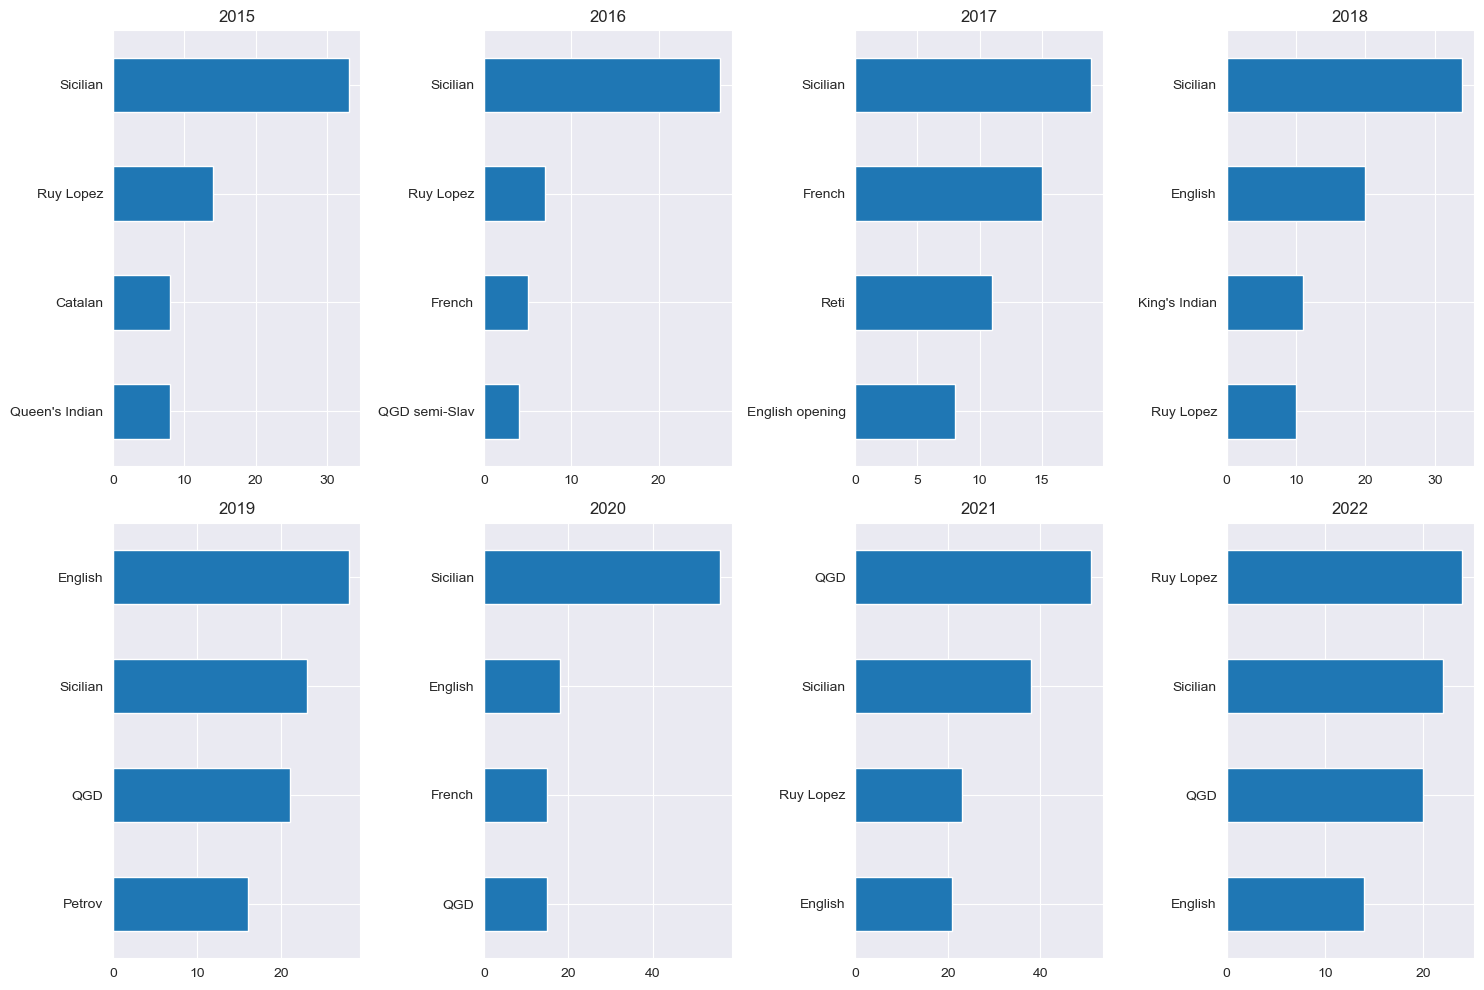

In [91]:
# Openings by year playing by Duda
fig, axs = plt.subplots(2, 4, figsize = (15, 10))
axs = axs.flatten()
for i, myyear in enumerate (range (2015, 2023)):
    df_duda.query("Year == @myyear")['Opening'].value_counts(ascending = True).tail(4).plot(kind = 'barh', title = myyear, 
                                                                                       ax = axs[i]
                                                                  )
plt.tight_layout()
plt.show()

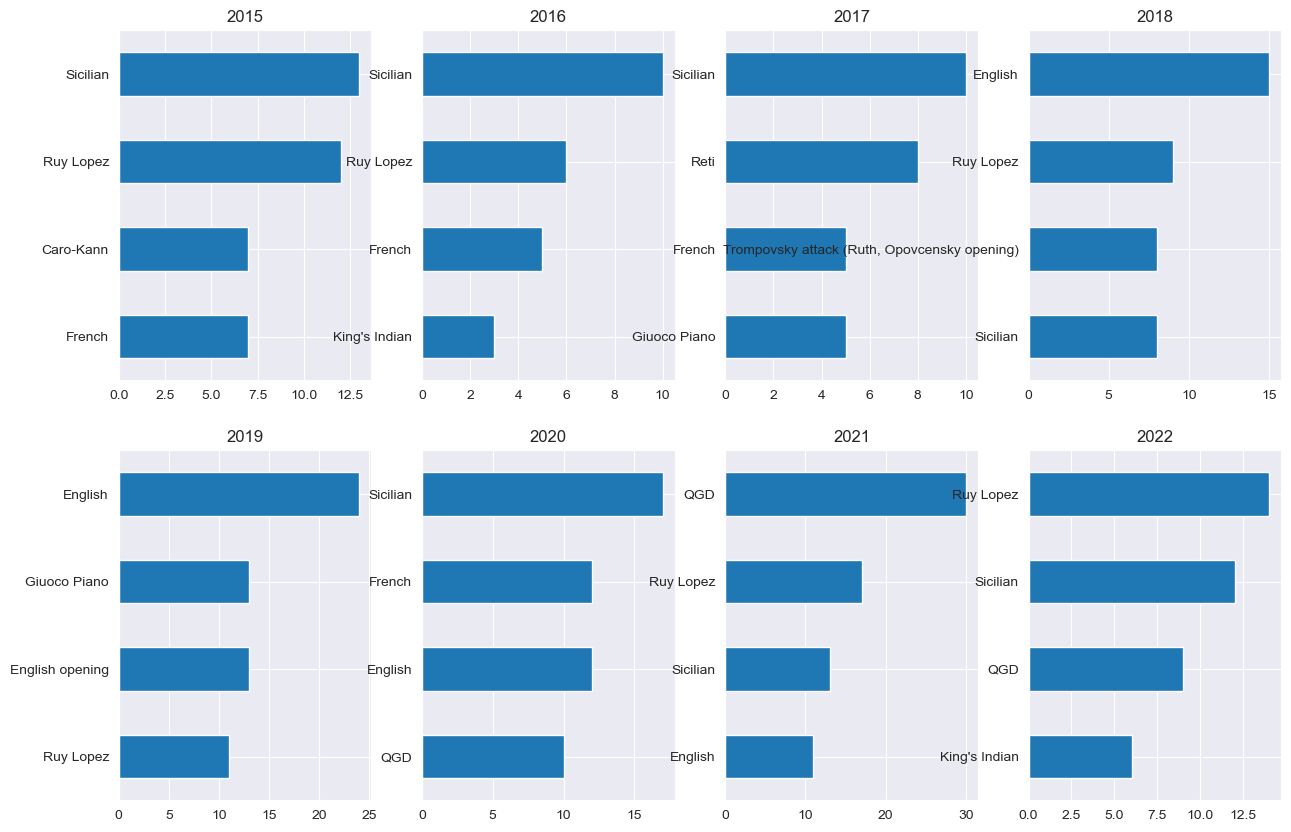

In [100]:
# Openings played by Duda when he was white
fig, axs = plt.subplots(2, 4, figsize = (15, 8))
axs = axs.flatten()
for i, myyear in enumerate (range (2015, 2023)):
    duda_white.query("Year == @myyear")['Opening'].value_counts(ascending = True).tail(4).plot(kind = 'barh', title = myyear, 
                                                                                       ax = axs[i] )
plt.show()

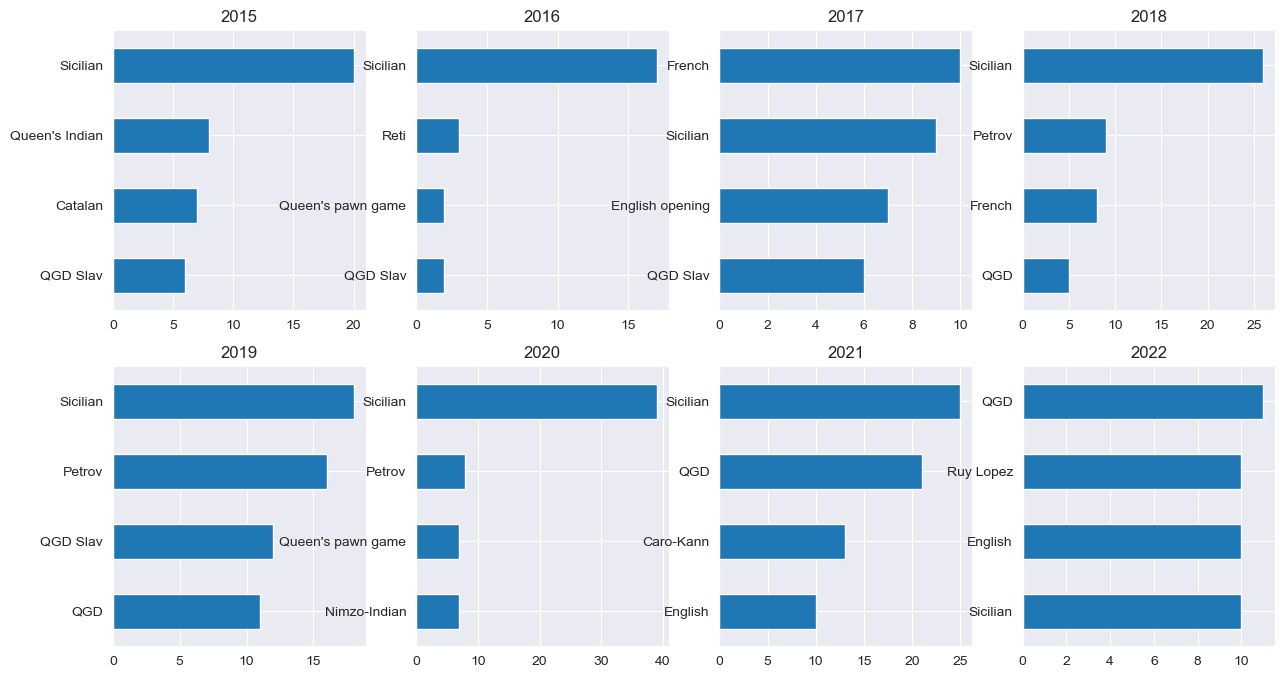

In [101]:
# Openings played by Duda when he was black
fig, axs = plt.subplots(2, 4, figsize = (15, 8))
axs = axs.flatten()
for i, myyear in enumerate (range (2015, 2023)):
    duda_black.query("Year == @myyear")['Opening'].value_counts(ascending = True).tail(4).plot(kind = 'barh', title = myyear, 
                                                                                       ax = axs[i])
plt.show()

In [103]:
# Duda games ratings differences and results
d_results = (
    df_duda.dropna(subset = ["BlackElo", "WhiteElo"])
    .astype({"BlackElo": "int", "WhiteElo": "int"})
    .copy())
d_results["Elo_diff"] = d_results["BlackElo"] - d_results["WhiteElo"]

In [105]:
d_results.head()

,twic_number,White,Black,Date,EventDate,Event,Result,mainline_moves,Site,Online,Round,ECO,Opening,WhiteFideId,BlackFideId,WhiteElo,BlackElo,Variation,WhiteTitle,BlackTitle,WhiteTeam,BlackTeam,EventType,FEN,SetUp,Variant,Board,PlyCount,EventCategory,Year,Elo_diff
123,1260,"Huzman,A","Duda,J",2018-12-26,2018.12.26,World Rapid 2018,0-1,1. Nf3 Nf6 2. c4 g6 3. Nc3 d5 4. cxd5 Nxd5 5. ...,St Petersburg RUS,False,2.27,A15,English opening,2803828,1170546,2580,2738,None,GM,GM,None,None,None,None,None,None,None,None,None,2018,158
201,1260,"Duda,J",Wang Hao,2018-12-26,2018.12.26,World Rapid 2018,1/2-1/2,1. Nf3 d5 2. c4 e6 3. e3 Nf6 4. b3 b6 5. Bb2 B...,St Petersburg RUS,False,3.5,A13,English opening,1170546,8602883,2738,2730,Agincourt variation,GM,GM,None,None,None,None,None,None,None,None,None,2018,-8
306,1260,Yu Yangyi,"Duda,J",2018-12-26,2018.12.26,World Rapid 2018,1-0,1. e4 e5 2. Nf3 Nf6 3. Nxe5 d6 4. Nf3 Nxe4 5. ...,St Petersburg RUS,False,4.8,C42,Petrov,8603820,1170546,2764,2738,classical attack,GM,GM,None,None,None,None,None,None,None,None,None,2018,-26
430,1260,"Duda,J","Miton,K",2018-12-26,2018.12.26,World Rapid 2018,1/2-1/2,1. d4 Nf6 2. Bg5 e6 3. e4 h6 4. Bxf6 Qxf6 5. c...,St Petersburg RUS,False,5.30,A45,"Trompovsky attack (Ruth, Opovcensky opening)",1170546,1111914,2738,2588,None,GM,GM,None,None,None,None,None,None,None,None,None,2018,-150
535,1260,"Gareev,T","Duda,J",2018-12-27,2018.12.26,World Rapid 2018,0-1,1. g4 d5 2. Bg2 Bxg4 3. c4 d4 4. Bxb7 Nd7 5. B...,St Petersburg RUS,False,6.34,A00,Grob,14200937,1170546,2569,2738,Romford counter-gambit,GM,GM,None,None,None,None,None,None,None,None,None,2018,169


<AxesSubplot:title={'center':'Difference between Ratings'}, ylabel='Frequency'>

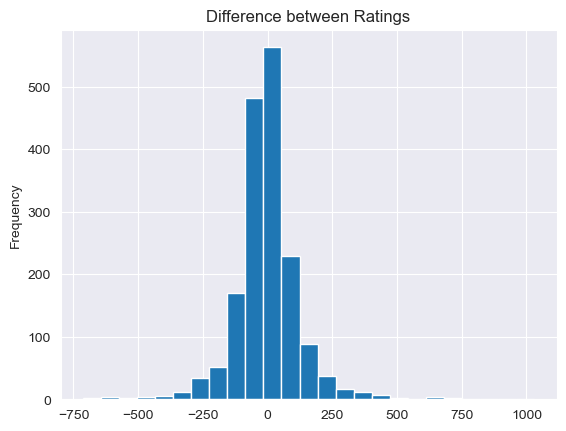

In [109]:
d_results["Elo_diff"].plot(kind = "hist", bins = 25, title = "Difference between Ratings")

In [111]:
# Win/draw/lost percent of his games
d_results.shape

(1728, 31)

In [112]:
d_results.query("(White == 'Duda,J' and Result == '1-0') or (Black == 'Duda,J' and Result == '0-1')").shape

(705, 31)

In [114]:
d_results.query("(White == 'Duda,J' and Result == '1/2-1/2') or (Black == 'Duda,J' and Result == '1/2-1/2')").shape

(611, 31)

In [117]:
print(705 / 1728)
print(611/1728)
print((1728-705-611)/1728)

0.4079861111111111
0.35358796296296297
0.23842592592592593


### Duda won 41% of games, draw 35 and lose 24%

In [125]:
#These queries can be useful in pgn analysis of his games
win_query = d_results.query("(White == 'Duda,J' and Result == '1-0') or (Black == 'Duda,J' and Result == '0-1')")
lose_query = d_results.query("(White == 'Duda,J' and Result == '0-1') or (Black == 'Duda,J' and Result == '1-0')")

In [131]:
# These also
d_results["WhiteIsRatedHigher"] = d_results["WhiteElo"] > d_results["BlackElo"]

In [132]:
# Games won by lower rating player
d_results.query("(WhiteIsRatedHigher and Result == '0-1') or (not WhiteIsRatedHigher and Result == '1-0')").shape

(367, 32)

In [133]:
d_results.shape

(1728, 32)

In [134]:
367 / 1728

0.21238425925925927

### 21% games were won by lower rating player


In [140]:
# set with games lost by Duda
duda_lose_query = d_results.query("(WhiteIsRatedHigher and Result == '0-1') or (not WhiteIsRatedHigher and Result == '1-0')")
duda_lose_query

,twic_number,White,Black,Date,EventDate,Event,Result,mainline_moves,Site,Online,Round,ECO,Opening,WhiteFideId,BlackFideId,WhiteElo,BlackElo,Variation,WhiteTitle,BlackTitle,WhiteTeam,BlackTeam,EventType,FEN,SetUp,Variant,Board,PlyCount,EventCategory,Year,Elo_diff,WhiteIsRatedHigher
2649,1260,"Svidler,P","Duda,J",2018-12-29,2018.12.29,World Blitz 2018,1-0,1. Nf3 Nf6 2. c4 e6 3. e3 d5 4. b3 Be7 5. Bb2 ...,St Petersburg RUS,False,5.6,A15,English opening,4102142,1170546,2737,2738,None,GM,GM,None,None,blitz,None,None,None,None,None,None,2018,1,False
3435,1260,"Nepomniachtchi,I","Duda,J",2018-12-30,2018.12.29,World Blitz 2018,0-1,1. e4 c5 2. Nf3 d6 3. d4 cxd4 4. Nxd4 Nf6 5. N...,St Petersburg RUS,False,13.3,B81,Sicilian,4168119,1170546,2763,2738,"Scheveningen, Keres attack",GM,GM,None,None,blitz,None,None,None,None,None,None,2018,-25,True
3621,1260,"Duda,J","Aronian,L",2018-12-30,2018.12.29,World Blitz 2018,1-0,1. Nf3 d5 2. c4 e6 3. e3 Nf6 4. Nc3 Be7 5. b3 ...,St Petersburg RUS,False,15.2,A13,English opening,1170546,13300474,2738,2765,Agincourt variation,GM,GM,None,None,blitz,None,None,None,None,None,None,2018,27,False
3984,1260,"Duda,J","Giri,A",2018-12-30,2018.12.29,World Blitz 2018,1-0,1. d4 d5 2. Bf4 Nf6 3. e3 e6 4. Nd2 Bd6 5. Bg3...,St Petersburg RUS,False,19.2,D00,"Queen's pawn, Mason variation",1170546,24116068,2738,2783,None,GM,GM,None,None,blitz,None,None,None,None,None,None,2018,45,False
12348,1056,"Mista,A","Duda,J",2015-02-01,2014.10.18,Bundesliga 2014-15,0-1,1. e4 c5 2. Nf3 d6 3. d4 cxd4 4. Nxd4 Nf6 5. N...,Rostock GER,False,9.3,B91,Sicilian,1110381,1170546,2616,2599,"Najdorf, Zagreb (fianchetto) variation",GM,GM,SF Berlin 1903,Hamburger SK,team,None,None,None,None,None,None,2015,-17,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1962057,1450,"Carlsen,M","Duda,J",2022-08-19,2022.08.15,FTX Crypto Cup 2022,0-1,1. b3 Nf6 2. Bb2 d5 3. e3 Bf5 4. Bxf6 gxf6 5. ...,Miami USA,False,5.5,A01,Nimzovich-Larsen attack,1503014,1170546,2864,2740,Indian variation,GM,GM,None,None,None,None,None,None,None,None,None,2022,-124,True
1962058,1450,"Duda,J","Carlsen,M",2022-08-19,2022.08.15,FTX Crypto Cup 2022,1-0,1. d4 Nf6 2. Bg5 e6 3. e4 h6 4. Bxf6 Qxf6 5. c...,Miami USA,False,5.6,A45,"Trompovsky attack (Ruth, Opovcensky opening)",1170546,1503014,2740,2864,None,GM,GM,None,None,None,None,None,None,None,None,None,2022,124,False
1962071,1450,"Duda,J","Praggnanandhaa,R",2022-08-20,2022.08.15,FTX Crypto Cup 2022,0-1,1. c4 e5 2. Nc3 Nf6 3. e3 Bb4 4. Nge2 O-O 5. a...,Miami USA,False,6.4,A22,English opening,1170546,25059530,2740,2661,None,GM,GM,None,None,None,None,None,None,None,None,None,2022,-79,True
1962078,1450,"Duda,J","Giri,A",2022-08-21,2022.08.15,FTX Crypto Cup 2022,1-0,1. e4 e5 2. Nf3 Nc6 3. Bb5 Nf6 4. O-O Nxe4 5. ...,Miami USA,False,7.1,C67,Ruy Lopez,1170546,24116068,2740,2760,"Berlin defence, open variation",GM,GM,None,None,None,None,None,None,None,None,None,2022,20,False


In [146]:
duda_lose_query["Elo_diff_abs"] = duda_lose_query["Elo_diff"].abs()

In [147]:
# Duda lost games with elo differnce
duda_lose_query.query("(White == 'Duda,J' and Result == '0-1') or (Black == 'Duda,J' and Result == '1-0')").sort_values("Elo_diff_abs", ascending = False)

,twic_number,White,Black,Date,EventDate,Event,Result,mainline_moves,Site,Online,Round,ECO,Opening,WhiteFideId,BlackFideId,WhiteElo,BlackElo,Variation,WhiteTitle,BlackTitle,WhiteTeam,BlackTeam,EventType,FEN,SetUp,Variant,Board,PlyCount,EventCategory,Year,Elo_diff,WhiteIsRatedHigher,Elo_diff_abs
1174470,1217,"Psyk,Radoslaw","Duda,J",2018-03-03,2018.03.03,TCh-POL Rapid 2018,1-0,1. e4 e5 2. Nf3 Nc6 3. Bb5 a6 4. Ba4 Nf6 5. O-...,Zgierz POL,False,5.25,C88,Ruy Lopez,1182838,1170546,2313,2724,"closed, anti-Marshall 8.a4",None,GM,KSz PiÄ tka Skierniewice,MKS MOS Wieliczka,rapid,None,None,None,None,None,None,2018,411,False,411
1174555,1217,"Duda,J","Lewtak,Da",2018-03-03,2018.03.03,TCh-POL Rapid 2018,0-1,1. d4 Nf6 2. Nf3 d6 3. c4 Nbd7 4. Nc3 e5 5. d5...,Zgierz POL,False,8.17,A46,Queen's pawn game,1170546,1141724,2724,2370,None,GM,None,MKS MOS Wieliczka,GOSTMAT Gostynin,rapid,None,None,None,None,None,None,2018,-354,True,354
1542838,1448,"Duda,J","Paragua,M",2022-08-05,2022.07.29,44th Olympiad 2022,0-1,1. e4 c5 2. Nf3 d6 3. d4 cxd4 4. Nxd4 Nf6 5. N...,Chennai IND,False,7.13,B90,Sicilian,1170546,5201241,2750,2461,"Najdorf, Adams attack",GM,GM,Poland,Philippines,None,None,None,None,None,None,None,2022,-289,True,289
197779,1415,"Duda,J","Klekowski,M",2021-12-17,2021.12.17,European Blitz 2021,0-1,1. d4 Nf6 2. Nf3 e6 3. Bg5 d5 4. e3 Be7 5. Nbd...,Katowice POL,False,19.1,A46,Queen's pawn,1170546,1132717,2760,2479,Torre attack,GM,GM,None,None,None,None,None,None,None,None,None,2021,-281,True,281
197957,1415,"Duda,J","Schneider,Il",2021-12-17,2021.12.17,European Blitz 2021,0-1,1. e4 Nc6 2. Nf3 f5 3. exf5 d5 4. Bb5 Bxf5 5. ...,Katowice POL,False,22.1,B00,KP,1170546,4663306,2760,2479,Colorado counter,GM,IM,None,None,None,None,None,None,None,None,None,2021,-281,True,281
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91964,1270,"Harikrishna,P","Duda,J",2019-03-08,2019.03.06,1st Prague Masters 2019,1-0,1. e4 c5 2. Nf3 Nc6 3. Nc3 Nf6 4. Bb5 Qc7 5. O...,Prague CZE,False,3.5,B30,Sicilian defence,5007003,1170546,2730,2731,None,GM,GM,None,None,None,None,None,None,None,None,None,2019,1,False,1
358142,1093,"Safarli,E","Duda,J",2015-10-14,2015.10.13,World Blitz 2015,1-0,1. e4 c5 2. Nf3 d6 3. d4 cxd4 4. Nxd4 Nf6 5. N...,Berlin GER,False,21.36,B90,Sicilian,13402129,1170546,2657,2658,"Najdorf, Byrne (English) attack",GM,GM,None,None,None,None,None,None,None,None,None,2015,1,False,1
1523021,1333,"Karjakin,Sergey","Duda,J",2020-05-19,2020.05.19,Lindores Abbey Prelim,1-0,1. e4 c5 2. Nf3 d6 3. d4 cxd4 4. Nxd4 Nf6 5. N...,chess24.com INT,True,4.2,B97,Sicilian,14109603,1170546,2752,2753,"Najdorf, Poisoned pawn variation",GM,GM,None,None,None,None,None,None,None,None,None,2020,1,False,1
2649,1260,"Svidler,P","Duda,J",2018-12-29,2018.12.29,World Blitz 2018,1-0,1. Nf3 Nf6 2. c4 e6 3. e3 d5 4. b3 Be7 5. Bb2 ...,St Petersburg RUS,False,5.6,A15,English opening,4102142,1170546,2737,2738,None,GM,GM,None,None,blitz,None,None,None,None,None,None,2018,1,False,1


### Biggest difference when Duda lost was 411 with polish player Radosław Psyk and the biggest with white was with Damian Lewtak - 354 elo diffrence. 
## Now I want to analyze these two games

In [149]:
# Library to analyze chess pgns
import chess.pgn

In [150]:
# Pull the PGN file of game with Radosław Psyk
with open (r'C:\Users\sebas\Downloads\archive (9)\pgns\twic1217.pgn') as f:
    for _ in range(1_000_000):
        game = chess.pgn.read_game(f)
        if (game.headers["Event"] == "TCh-POL Rapid 2018") & (game.headers["Round"] == "5.25"):
            if game.headers["Black"] == "Duda,J":
                break

In [152]:
game.headers

Headers(Event='TCh-POL Rapid 2018', Site='Zgierz POL', Date='2018.03.03', Round='5.25', White='Psyk,Radoslaw', Black='Duda,J', Result='1-0', BlackElo='2724', BlackFideId='1170546', BlackTeam='MKS MOS Wieliczka', BlackTitle='GM', ECO='C88', EventDate='2018.03.03', EventType='rapid', Opening='Ruy Lopez', Variation='closed, anti-Marshall 8.a4', WhiteElo='2313', WhiteFideId='1182838', WhiteTeam='KSz PiÄ…tka Skierniewice')

In [153]:
game.mainline_moves()

<Mainline at 0x2585f4255b0 (1. e4 e5 2. Nf3 Nc6 3. Bb5 a6 4. Ba4 Nf6 5. O-O Be7 6. Re1 b5 7. Bb3 O-O 8. a4 b4 9. c3 Rb8 10. d4 d6 11. h3 Bb7 12. Nbd2 Qd7 13. Nf1 h6 14. Ng3 Rfe8 15. Bc2 Bf8 16. Nf5 Ba8 17. N3h4 bxc3 18. bxc3 exd4 19. Qf3 Ne5 20. Qg3 d3 21. Bxh6 Ng6 22. Bxd3 Kh7 23. Bg5 Nxe4 24. Bxe4 Bxe4 25. Nxg6 fxg6 26. Qh4+ Kg8 27. Rxe4 Rxe4 28. Qxe4 gxf5 29. Qd5+ Qf7 30. Qf3 Rb2 31. Re1 d5 32. Qf4 Bc5 33. Bh4 c6 34. Qe5 Kh7 35. Qf4 Rc2 36. Qf3 a5 37. Qd3 Rb2 38. Bg3 g6 39. Bh4 Ra2 40. Qg3 Rxa4 41. Bg5 Ra2 42. Qh4+ Kg8 43. Rf1 a4 44. Kh1 a3 45. Bf6 Qh7 46. Qa4 Rxf2 47. Re1 Qf7 48. Qh4 Qh7 49. Re8+ Bf8 50. Rxf8+ Kxf8 51. Qxh7 a2 52. Qg7+ Ke8 53. Qe7#)>

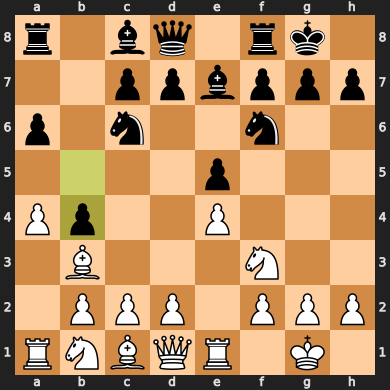

In [158]:
# exemplary arrangement of figures on the board (at the 15 move)
board = chess.Board()
for ply, move in enumerate(game.mainline_moves()):
    board.push(move)
    if ply == 15:
        break
board

In [159]:
#stockfish engine
!pip install stockfish

In [166]:
STOCKFISH_PATH = (r"C:\Users\sebas\Downloads\stockfish_15.1_win_x64_avx2\stockfish_15.1_win_x64_avx2\stockfish-windows-2022-x86-64-avx2.exe")
from stockfish import Stockfish
from tqdm.notebook import tqdm

stockfish = Stockfish(
    path = STOCKFISH_PATH,
    depth = 18,
    parameters = {"Threads": 32, "Minimum Thinking Time": 5},)

In [167]:
# Loop over the game, evaluate each step
results = []
board = chess.Board()
ply_length = len([x for x in game.mainline_moves()])
for ply, move in tqdm(enumerate(game.mainline_moves()), total = ply_length):
    board.push(move)
    stockfish.set_fen_position(board.fen())
    evaluation = stockfish.get_evaluation()
    results.append(evaluation)

  0%|          | 0/105 [00:00<?, ?it/s]

<AxesSubplot:title={'center':'Game evaluation'}>

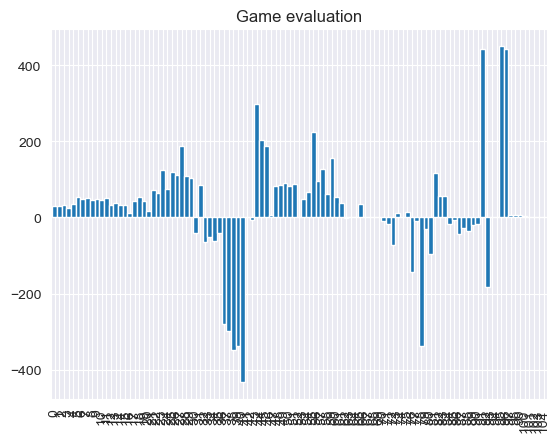

In [170]:
# game evaluation with Psyk - viz
pd.DataFrame(results)["value"].plot(kind = 'bar', width = 1, title = "Game evaluation")

In [171]:
# Pull the PGN file of game with Damian Lewtak
with open (r'C:\Users\sebas\Downloads\archive (9)\pgns\twic1217.pgn') as f:
    for _ in range(1_000_000):
        game = chess.pgn.read_game(f)
        if (game.headers["Event"] == "TCh-POL Rapid 2018") & (game.headers["Round"] == "8.17"):
            if game.headers["White"] == "Duda,J":
                break

In [172]:
# Loop over the game, evaluate each step
results = []
board = chess.Board()
ply_length = len([x for x in game.mainline_moves()])
for ply, move in tqdm(enumerate(game.mainline_moves()), total = ply_length):
    board.push(move)
    stockfish.set_fen_position(board.fen())
    evaluation = stockfish.get_evaluation()
    results.append(evaluation)

  0%|          | 0/116 [00:00<?, ?it/s]

<AxesSubplot:title={'center':'Game evaluation'}>

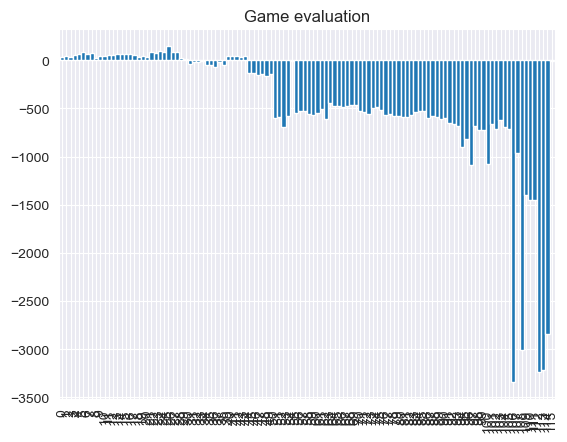

In [173]:
# Game evaluation with Lewtak - viz
pd.DataFrame(results)["value"].plot(kind = 'bar', width = 1, title = "Game evaluation")